# Backpropagation
## So lernt unser neuronales Netz effektiv
<br><img width=800 height=800 class="imgright" src="Images/Backpropagation.png"><br><br>

Backpropagation heisst der Algorithmus, der neuronale Netze lernfähig macht und überall bei ihrer Anwendung benutzt wird. Es handelt sich darum, für jedes Neuron zu bestimmen, wie es den Fehler am Ausgang des Netzes beeinflusst. Der Fehler wird also vom Ausgang auf die vorangehenden Neurone projeziert, deshalb der Name Backpropagation. Wir möchten dieses jetzt von Grund auf erklären.

Die grundlegende Idee ist, dass man, wenn man weiss, wieviel jedes einzelne Neuron zum Gesamtfehler des Netzes beiträgt, jedes Gewicht im Netz so anpassen kann, dass der Gesamtfehler sinkt. Nach jedem Vorwärtsdurchlauf durch das Netz machen wir also auch einen Durchlauf in die andere Richtung, wobei wir ebenfalls Layer für Layer vorgehen können. 

Um den Backpropagation Algorithmus vollständig zu verstehen, werden wir unser Netzwerk noch weiter vereinfachen und auch den Begriff der one-hot Kodierung einführen.
Nehmen wir an, dass wir einen Klassifikator mit einem neuronalen Netz programmieren wollen.
Dieser empfängt X und Y Koordinatenwerte aus dem Bereich 0 bis 1, die die Position von Punkten in einer Ebene abbilden. Er soll dann diese Punkte, die eine Eigenschaft (z.B. Farbe) haben, die mit 0 oder 1 kodiert ist, klassifizieren, so dass die Voraussage des Klassifikators möglichst genau mit den echten Eigenschaften der Punkte übereinstimmt. 
Für unser Beispiel nehmen wir unsere bekannten 2 Monde aus der sklearn Bibliothek mit 200 Punkten und den Farben grün und blau als Eigenschaften.
<br><img width=800 height=800 class="imgright" src="Images/Punktewolke.png"><br><br>


Die Farben der Punkte in der Ebene würden dann im Idealfall genau den Voraussagen des Klassifikators entsprechen, der mit den x und y Koordinaten der Punkte arbeitet.
Die Label der Punkte wollen wir jetzt etwas anders ausdrücken. Wir haben als Ergebnis das Label 1 oder 0 (für grün oder blau). Statt das Ergebnis durch einen einzige Zahl auszudrücken, deren Wert dann die Zuordnung zur Klasse bestimmt, wollen wir eine one-hot Kodierung verwenden. Diese wird beim ML sehr häufig verwendet, wenn man Daten hat, die in bestimmte Kategorien fallen. Für den Computer ist eine Liste von Zahlen, die nur Werte von 1 oder 0 haben können, nicht selten einfacher zu bearbeiten ist als ein einzelner Wert als Fliesskommazahl.  <br> Hätten wir einen Klassifikator mit den möglichen Ausgängen "Katze","Hund","Meerschweinchen","Papagei" als "Freunde des Menschen", so würden diese one-hot kodiert so aussehen:
<br><img width=800 height=800 class="imgright" src="Images/one_hot.png"><br><br>
Dies macht es für uns nicht einfacher lesbar, aber der Computer kann die Kategorien so sehr effektiv bearbeiten.


Unser Netz soll zum einen einen noch einfacheren Aufbau haben und zum anderen keine Aktivierungsfunktion verwenden, diese führen wir später wieder ein. Auch auf den Bias verzichten wir zuächst. <br><br> Wir haben nur 4 Neuronen, 2 Eingänge und zwei Ausgänge und insgesamt 8 Gewichte (später mit Bias 12). Wir sehen, dass jetzt jeder Eintrag im one-hot kodierten Label mit einem eigenen Ausgang verglichen wird. Entsprechend ist auch die Fehlerfunktion unsres Netzes aufgebaut. Sie entspricht jewiles zur Hälfte der Summe aus den beiden Abweichungen von C und D zum jeweiligen one-hot Eintrag im Label zum Quadrat. (s.u.)  Hier das Netz:<br><img width=800 height=800 class="imgright" src="Images/Mininetz.png"><br><br>

Den Fehler am Ausgang des Netzes bestimmen wir also mit der quadratischen Fehlerfunktion.<br><br>
$$Gesamtfehler=1/2*(C-Label0)^2 + 1/2*(D-Label1)^2$$<br>
Wir haben in dieser Funktion 2 gleichwertige Terme, die zum Gesamtfehler beitragen, was uns die weiteren Betrachtungen sehr erleichtert.
Wir benötigen jetzt zum Lernen in den Neuronen auch den zweiten Speicherwert, den wir AD,BD... nennen. Das Ergebnis Aus0 und Aus1 ist gleich der Höhe des Wertes von C und D, diese geben ihren Inhalt einfach an den Ausgang weiter. Wir haben keine Aktivierungsfunktion, C und D ist also nur von der gewichteten Summe der Eingänge von A und B abhängig. <br>C ist damit ```B * BC + A * AC``` und D ist damit ```B * BD + A * AD``` <br> Die Werte für AD,BD... wollen wir jetzt nutzen, um den Fehler des Netzwerkes jeweils um eine Schicht zurückrechnen zu können, also z.B. zu berechnen, was zum Beispiel am Ende eine Änderung von X zum Gesamtfehler beiträgt. Zunächst setzen wir das Netz wieder programmtechnisch um und nehmen als Label die Farben unserer Punkte one-hot kodiert. Das Programm zeigt uns die Werte der ersten 5 Samples und den Gesamtfehler des Netzes mit unseren initial zufällig im Bereich ```gewichtsbereich``` erzeugten Gewichten, hier +/- 0.2. Wir haben die X- und Y-Koordinaten der Punkte auf den Bereich 0-1 skaliert und die Label one-hot kodiert. Das folgende Programm erzeugt das Netz und berechnet je einen Durchgang für die ersten 5 Samples.

In [1]:
from sklearn import datasets,preprocessing
import numpy as np
import matplotlib.pyplot as plt
import random

X,y=datasets.make_moons(n_samples=200, noise=.05, random_state=1)

#scale X 0-1
scaler = preprocessing.minmax_scale(X,feature_range=(0, 1),  copy=False)


#hot encode y
enc=preprocessing.OneHotEncoder()
y=y.reshape(-1,1)
enc.fit(y)
y_hot=enc.transform(y).toarray()

#make structure
neuronen_liste=["X","Y","A","B","C","D"]
gewichte_liste=["XA","XB","YA","YB","AC","AD","BC","BD"]
gewichtsbereich=.2
gewichte_dict,neuronen_dict={},{}
for elem in neuronen_liste:
    neuronen_dict[elem]=[0,0]
for elem in gewichte_liste:
    gewichte_dict[elem]=random.uniform(-gewichtsbereich,gewichtsbereich)

def fehler(C,D,y):
    return .5*(C-y[0])**2+.5*(D-y[1])**2
    
def vorwärts(nr):    
    neuronen_dict["X"]=[X[nr][0],0]
    neuronen_dict["Y"]=[X[nr][1],0]
    
    for neuron in neuronen_liste:        
        for name,gewicht in gewichte_dict.items():
            if name[1]==neuron:                
                neuronen_dict[name[1]][0]+=gewichte_dict[name]*neuronen_dict[name[0][0]][0]
    return fehler(neuronen_dict["C"][0],neuronen_dict["D"][0],y_hot[nr])

for i in range(5):        
    print(f" Eingänge: {X[i][0]:6.3f},{X[i][1]:6.3f}, Fehler: {vorwärts(i):6.3f}, Label: {y_hot[i]}")

 Eingänge:  0.241, 0.929, Fehler:  0.503, Label: [1. 0.]
 Eingänge:  0.437, 0.986, Fehler:  0.512, Label: [1. 0.]
 Eingänge:  0.487, 0.904, Fehler:  0.528, Label: [1. 0.]
 Eingänge:  0.322, 0.601, Fehler:  0.362, Label: [0. 1.]
 Eingänge:  0.937, 0.408, Fehler:  0.335, Label: [0. 1.]



Hier die Kurve für den Gesamtfehler in Abhängigkeit von C und D, der Label ist hier [1,0] . Wir haben diese berechnet, indem wir in für diesen speziellen Label die Werte für C oder D von -3 bis +3 variiert haben und dann den Gesamtfehler berechnet haben. Wir werden im unserem Netz später nicht die Neuronen direkt, sondern die Gewichte verändern.<br> Wie wir bereits gezeigt haben, entspricht am Ausgang des Netzes der Wert von C oder D direkt dem Ausgangswert, hier gibt es kein Gewicht. 

<br><img width=800 height=800 class="imgright" src="Images/FehlerC.png"><br><br>
<br><img width=800 height=800 class="imgright" src="Images/FehlerD.png"><br><br>

Die beiden Kurven unterscheiden sich. Für den Label [1,0] erreicht C den geringsten Fehler bei 1, und da D bei 0 bereits bei seinem Minimum steht, erreicht die Gesamtfehlerkurve das Minimum von 0 bei einem Wert von C=1 .<br><br>$$Fehler=1/2*(C-Label0)^2+1/2*(D-Label1)^2  => Fehler=1/2*(C-Label0)^2 + 0$$<br><br> Für den Fehler von D sieht die Sache anders aus, C wurde in unserem Beispiel auf 0 gesetzt und ist damit weit vom Optimum ```1``` für Label0 entfernt.<br><br>$$Fehler=1/2*(C-Label0)^2+1/2*(D-Label1)^2  => Fehler=1^2+(D-Label1)^2$$<br><br>


Unten sieht man die 3-dimensionale Darstellung für Veränderungen von C und D gleichzeitig. Das Minimum von 0 wird bei C=1 und D=0 erreicht.
<br><img width=800 height=800 class="imgright" src="Images/FehlerCD.png"><br><br>
Hier noch einmal die Aufsicht:<b><br><br><img width=800 height=800 class="imgright" src="Images/KontourCD.png"><br><br>

Die Steigung (Tangente) der jeweiligen Fehlerkurve für ein spezifisches Ausgangsneuron und einen spezifischen Label gibt uns an, wie sehr sich der Gesamtfehler verändert, wenn man den Wert des Neurons verändert. Wir haben im nächsten Bild diese Steigung für C=-1 und Label [1,0] markiert. Es ist wichtig, sich immer vor Augen zu führen, dass <b>die Fehlerkurve nur für ein bestimmtes Ausgangsneuron und einen bestimmten Label gilt</b> und auch davon abhängt, was der <b>Wert des anderen Ausgang</b> hier (D=0) ist. 
<br><img width=800 height=800 class="imgright" src="Images/SteigungC.png"><br><br>

Diese Steigung sagt uns, wie sich der Gesamtfehler des Netzes bei kleinen Änderungen des Wertes von C ändert. Ginge z.B. C von -1.0 auf -0.9 nach rechts, die Änderung wäre also +0.1, würde sich der Fehler um -0.2 verändern => Steigung * C- Änderung. 
Wir sehen nun auch, wie praktisch unsere quadratische Fehlerfunktion ist. Die Steigung einer Kurve entspricht ja der Ableitung der zugrunde liegenden Funktion. <br>
Schauen wir uns das für unsere Fehlerfunktion an, müsste man sie nach C ableiten:<br><br>
$${dGesamtfehler}/{dC}$$ In unserer Fehlerfunktion $$Gesamtfehler=1/2*(C-Label0)^2 + 1/2*(D-Label1)^2$$<br> wäre der zweite Teil der Summe nicht von C abhängig, fällt in der Ableitung also weg.
Es bliebe also übrig:<br><br> $${d(1/2*(C-Label0)^2)}/{dC}$$ und die Ableitung hiervon ist einfach $$C-Label0$$<br>
Die Steigung ist einfach C-Label0. In unserem Beispiel ist C=-1 und der Label0=1, die Steigung also -2, wie wir oben schon gesehen haben. Einfacher geht es nicht und das macht die quadratische Fehlerfunktion so praktisch. Wir wissen jetzt für jeden bestimmten Wert eines Ausgangsneurons und seinen Label, wie sich der Gesamtfehler des Netzes ändert, wenn man den Wert des Neurons ändert. Diesen Wert speichern wir als "...Delta" Wert im Ausgangsneuron, z.B. als "CDelta". Es zeigt sich auch hier, wie bei der Gesamtfehlerberechnung mit zwei einzelnen Termen, der Vorteil der one-hot Kodierung in Verbindung mit einem Ausgang für jeden Einzellabel der Kodierung.


Wovon hängt der Wert von C ab? Von A und dem Gewicht AC, B und dem Gewicht BC und dem  seinem Bias von 1 mit seinem Gewicht CC, den wir jetzt wieder ergänzt haben. <br><br><br><img width=800 height=800 class="imgright" src="Images/CAbhängigkeit.png"><br><br>

Damit sind wir bereit für den ersten Schritt der Backpropagation. Nehmen wir an C sei -1 und der Label0 sei 1. Wir können dann die Steigung der Fehlerkurve mit<b> C-Label0 </b>(also -2) berechnen. Diesen Wert wollen wir für unsere weiteren Überlegungen <b>CDelta</b> nennen und ihn auch im zweiten Wert unserer Liste im Neuron C speichern, wie oben bereits beschrieben. Wenn nun A beispielweise den Wert 3 hätte, wie würde sich eine Änderung von AC um -0.1 auf C und damit Aus0 auswirken? Übergeben von A wird $A*AC$. Vermindern wir AC um 0.1 und nennen diesen Wert DeltaAC, wird, egal wie der Ausgangswert von AC war, zusätzlich übergeben: $-A*DeltaAC$. <br> vorher war der Wert: $A*AC$ nachher: $A*(AC+DeltaAC)=A*AC+A*DeltaAC$. Der Unterschied $nachher-vorher$ wäre also: $A*DeltaAC$. C wird sich um -$A*0.1*CDelta$ verändern. Also im Beispiel um <b>$3*-0.1*-2=+0.6$</b>. C und Aus0 würde damit von -1 auf -.4 steigen.</b> Dies ist genau das, was wir wissen wollen, in diesem Fall würde der Fehler an Aus0 also kleiner werden. Die Formel dazu (die natürlich nur für kleine Änderungen brauchbar wäre) wäre:<br><br> $${delta}Aus0=A*{delta}AC*CDelta$$ also: $${delta}Aus0=A*{delta}AC * (C-Label0)$$<br> <br><br> 

Wir wissen :<br> 1. dass dieses Verfahren nur für kleine Änderungen von AC funktioniert.<br> 2. dass C noch mehr Eingänge hat, die wir ebenfalls korrigieren möchten <br>3. dass man bei zu grosser Korrektur das Minimum der Fehlerkurve überspringen kann und den Fehler eventuell sogar erhöhen, wie unten als Beispiel dargestellt.<br><br><img class="imgright" src="Images/overshoot.png" alt="overshoot" />

In der Praxis werden wir uns so verhalten, dass wir die entsprechenden Gewichte jeweils nur um kleine Beträge korrigieren werden.<br>Wir können ein Gewicht so korrigieren, dass wir den Wert des Neurons (z.B. A), welches über das Gewicht (AC) seinen Wert in den Ausgang (C=Aus0) überträgt, mit der Steigung der Fehlerkurve des Ausgangsneurons (CDelta) multiplizieren. Dies wäre: A * CDelta. Dann subtrahieren wir diesen Wert von AC, aber nicht in voller Höhe.
Wir werden diese Verstellwerte durch Multiplikation mit der Lernrate (ein Hyperparameter unseres Netzes z.B 1e-3) verkleinern, um obige Fehler zu vermeiden. Damit können wir jetzt alle Gewichte, die Eingänge der Ausgangsneuronen darstellen, korrigieren, um den Gesamtfehler zu minimieren. Für unser Netz ist damit die Hälfte der Backpropagation geschafft!!
Was passiert in einfachen Worten?<br>
<b> Je grösser der Abstand des Ausgangs vom Zielwert und der Wert des zuführenden Neurons, umso mehr korrigieren wir die Gewichte der Verbindungen, von denen der Wert des Ausgangs abhängt, in die entgegengesetzte Richtung.</b>

Korrigieren wir unsere Gewichte AC,AD,BC und BD des Netzes für jede Sample jeweils einmal nach dieser Methode mit einer Lernrate von 0.001. Nun rechnen wir das Netz einmal für alle Samples durch. Für jede Sample vergleichen wir den Gesamtfehler, den das Netz vor der Korrektur der Gewichte produziert mit dem Fehler nach Korrektur. Der Unterschied macht bei Summation über alle Samples einen Rückgang von 0.201 aus (vorher Summe Gesamtfehler:83.382, nachher:83.180) aus. Das erscheint nicht viel für einen Durchgang, aber wir sind ja mit der Backpropagation noch nicht fertig. Interessant ist vielleicht noch, wie sich die Gewichte durch den Durchgang verändert haben.<br>
<table style=" width:80%; background-color: rgb(77, 225, 225); font-size: 16px">
<th style="vertical-align: top; text-align: center;">Gewicht
</th>
<th style="vertical-align: top; text-align: center;">vorher
</th>
<th style="vertical-align: top; text-align: center;">nachher
</th>

<tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht XA
<td style="vertical-align: top;text-align: center;">
-0.146
</td> 
<td style="vertical-align: top;text-align: center;">
-0.146
</td> 
</tr>
<tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht XB
<td style="vertical-align: top;text-align: center;">
0.139
</td> 
<td style="vertical-align: top;text-align: center;">
0.139
</td> 
</tr>
    <tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht YA
<td style="vertical-align: top;text-align: center;">
0.106
</td> 
<td style="vertical-align: top;text-align: center;">
0.106
</td> 
</tr>
<tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht YB
<td style="vertical-align: top;text-align: center;">
-0.098
</td> 
<td style="vertical-align: top;text-align: center;">
-0.098
</td> 
</tr>
<tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht AC
<td style="vertical-align: top;text-align: center;">
-0.002
</td> 
<td style="vertical-align: top;text-align: center;">
-0.007
</td> 
</tr>
<tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht AD
<td style="vertical-align: top;text-align: center;">
-0.020
</td> 
<td style="vertical-align: top;text-align: center;">
-0.039
</td> 
</tr>
<tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht BC
<td style="vertical-align: top;text-align: center;">
0.061 
</td> 
<td style="vertical-align: top;text-align: center;">
0.048
</td> 
</tr>    
<tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht BD
<td style="vertical-align: top;text-align: center;">
0.115 
</td> 
<td style="vertical-align: top;text-align: center;">
0.106
</td> 
</tr>    
<tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht AA
<td style="vertical-align: top;text-align: center;">
-0.162
</td> 
<td style="vertical-align: top;text-align: center;">
-0.162
</td> 
</tr>    
<tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht BB
<td style="vertical-align: top;text-align: center;">
-0.189
</td> 
<td style="vertical-align: top;text-align: center;">
-0.189
</td> 
</tr><tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht CC
<td style="vertical-align: top;text-align: center;">
0.134 
</td> 
<td style="vertical-align: top;text-align: center;">
0.197
</td> 
</tr><tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht DD
<td style="vertical-align: top;text-align: center;">
-0.027 
</td> 
<td style="vertical-align: top;text-align: center;">
0.071 
</td> 
</tr> 
</table>
<br>
Während die Gewichte AC,AD,BC und BD verringert wurden, ist CC und DD gewaltig gestiegen. Insgesamt müssen wir nun noch 8 weitere Gewichte anpassen.
    


Jetzt handelt es sich aber nicht Gewichte, die mit den Ausgängen verbunden sind, sondern um solche, die zu den Neuronen A und B führen. Wollen wir die Werte AD und BD berechnen, müssen wir überlegen, was A an den Ausgang bei C und D weitergibt, wenn wir die Gewichte AC und AD verändern um deltaAC und deltaAD . Es würde weitergegeben $(deltaAC * CDelta) + (deltaAD * DDelta)$. Dies wäre unser Wert für ADelta.<br> Entsprechend der Wert für BDelta: $(deltaBC * CDelta) + (deltaBD * DDelta)$<br>
Mit diesen Werten können wir nun alle Gewichte, die zu A bzw. B führen verstellen, z.B. für XA mit $-(X * ADelta * Lernrate)$.<br>
Für YB mit $-(Y * BDelta * Lernrate)$ usw.<br> Dies würden wir genau so fortsetzen, wenn wir weitere Layer hätten. Die besondere Behandlung der Ausgangsneuronen stammt daher, dass für sie keine Neuronen in der Schicht rechts existieren, sondern nur der Wert des Ausgangs. Denn was wir bei Gewichten, die vom Neuron1 rechts zum Neuron2 links führen, machen wäre : $Änderung\ des\ Gewichts\ von\ Neuron1\ zu\ Neuron2 = - (Wert\ von\ Neuron1 * Neuron2Delta\ * Lernrate)$. An den Eingängen müssen wir dieses Neuron2Delta aus der Fehlerkurve und dem Vergleich mit dem Label berechnen.

Wie schlägt sich unser kleines Netz mit dem Backpropagation-Algorithmus (wir haben noch keine Aktivierungsfunktion!). Es schlägt sich nicht gut. Wir sehen, dass das Modell eine gerade Linie durch die Ebene zieht als Entscheidungsgrenze, genau das, was ein Perzeptron auch könnte. Hier verwenden wir einen fertigen Algorithmus aus <b>sklearn,</b> um die Entwicklung der Entscheidungsgrenze unseres Mininetzes darzustellen, was jetzt noch nicht verstanden werden muß. Wir zeigen außerdem kurz, daß ein Netz mit mehr Neuronen und mit passender Aktivierungsfunktion das Problem löst. Wir zeigen das Verhalten des Netzes
mit 2,2,1 Neuronen und eines Netzes mit 10,10,10 Neuronen.

Struktur des Netzes: [2, 2, 1]


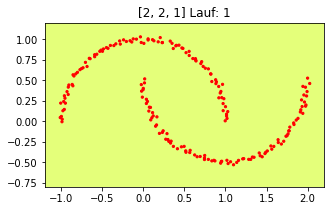

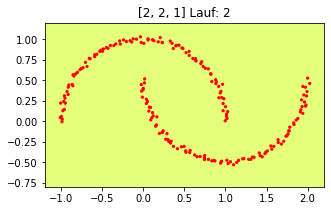

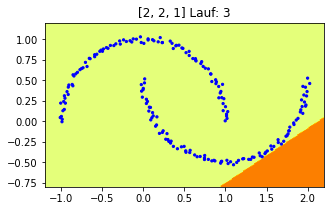

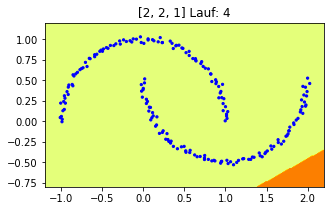

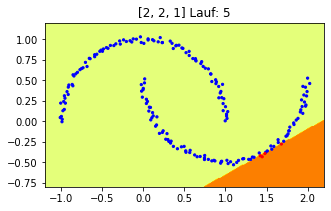

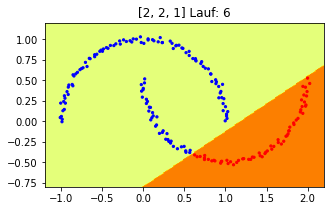

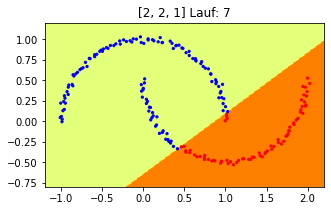

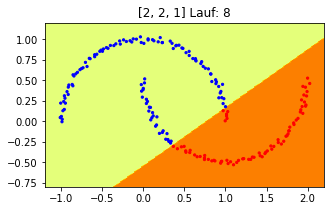

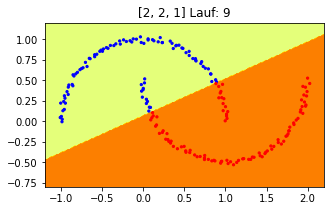

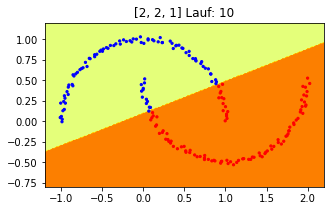

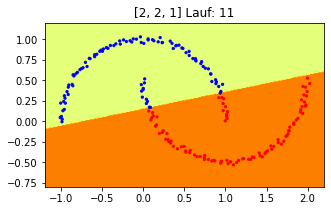

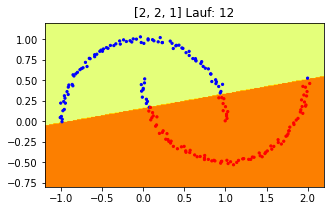

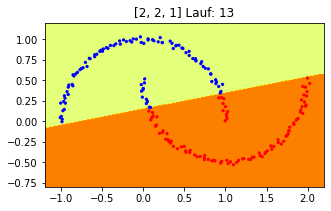

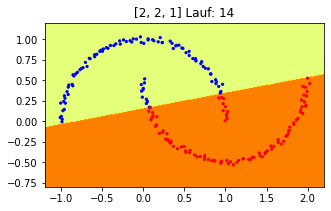

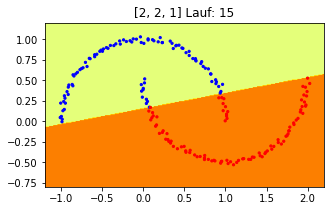

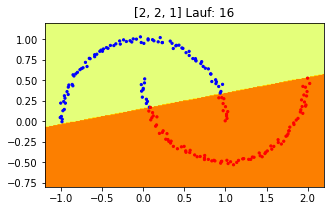

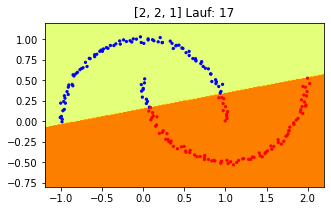

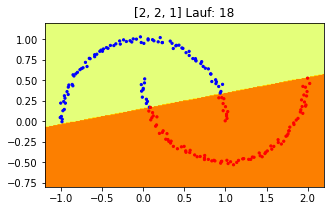

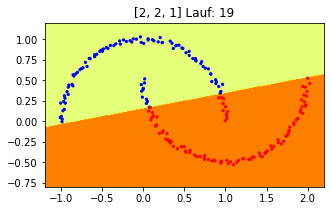

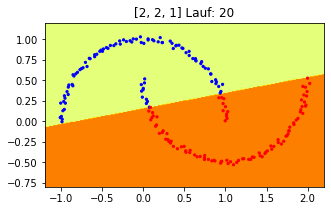

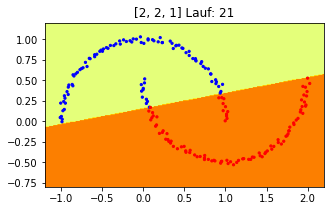

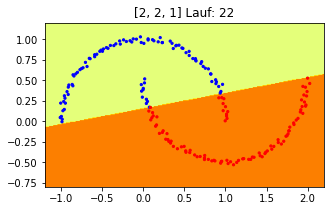

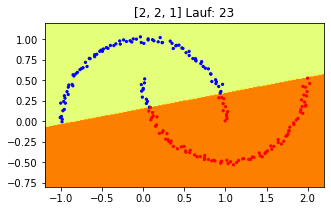

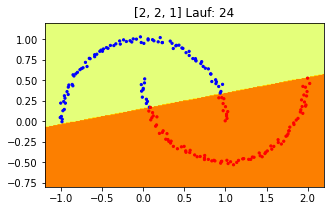

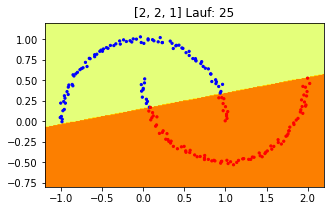

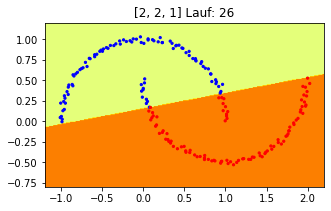

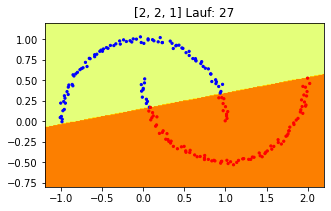

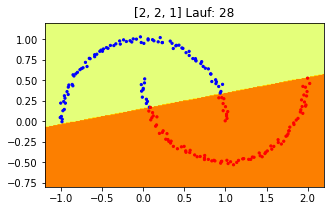

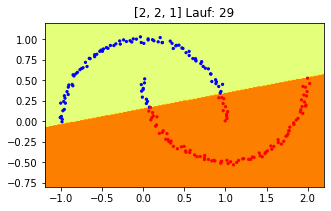

Accuracy: 0.89 [2, 2, 1]
Weiter? ->Return
Struktur des Netzes: [10, 10, 10]


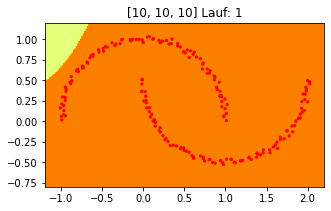

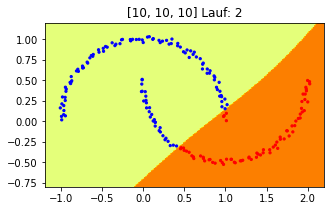

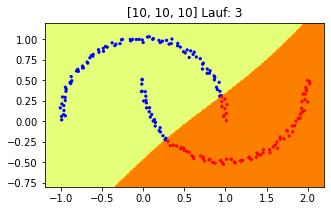

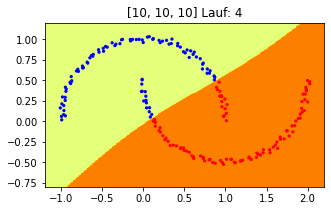

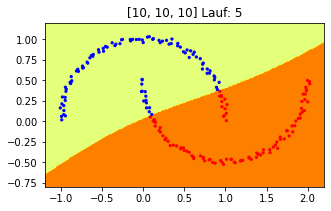

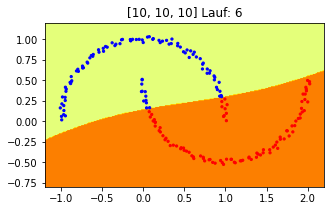

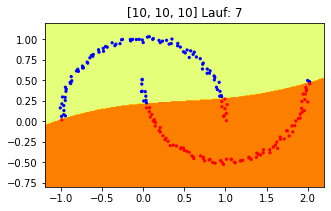

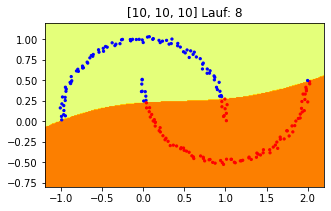

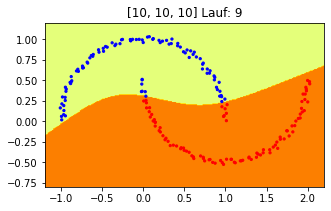

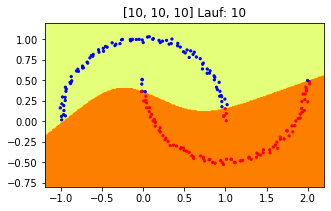

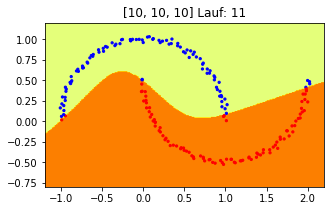

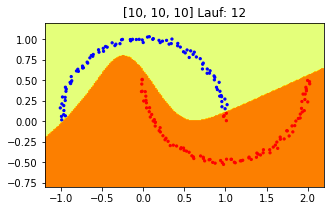

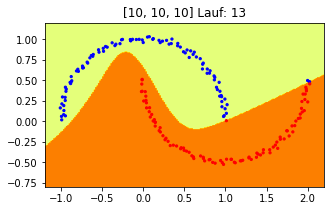

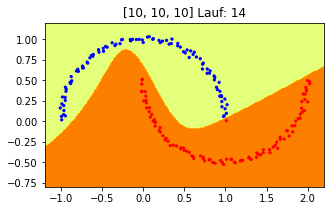

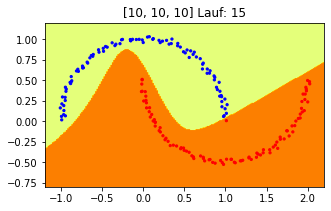

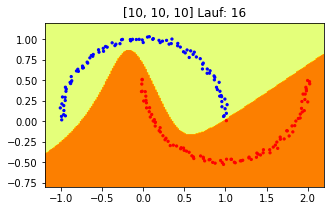

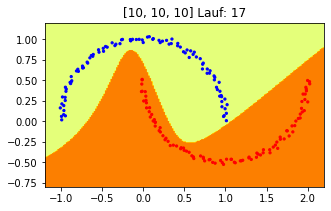

x 17 [10, 10, 10]
Accuracy: 1.0 [10, 10, 10]


In [3]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
def plot_background_image(f, xres=200, yres=200, extent = (-1.2,2.0,-1.2,2.0)):
    left,right,bottom,top = extent
    x_values=np.linspace(left,right,xres)
    y_values=np.linspace(bottom,top,yres)
    x1,y1=np.meshgrid(x_values,y_values)
    pixels=xres*yres
    x1 = x1.reshape(pixels,1)
    y1 = y1.reshape(pixels,1)
    X_grid=np.column_stack((x1, y1))
    Z=f(X_grid).reshape(xres,yres)
    plt.imshow(Z,origin="lower",extent=extent, cmap="Wistia")
#Plotgröße setzen (sonst unterschiedlich große Plots wenn plot_background_image nicht immer verwendet wird)
plt.rcParams["figure.figsize"]=5,5

X_train,y_train = datasets.make_moons(n_samples=200,noise=.02)
colormap=np.array(["blue","red"])


        



geo_int=[2,2,1]
print(f"Struktur des Netzes: {geo_int}")
von=1
bis=30
step=1
activation="identity"
solver="lbfgs"

for x in range(von,bis,step): # hier Lernen mit schrittweise gestigerten Durchläufen

    clf = MLPClassifier(activation=activation,solver=solver,hidden_layer_sizes=(geo_int),random_state=1, max_iter=x).fit(X_train, y_train)
    #Hintergrundbild plotten, dafür Klassifizierer für viele Gitterpunkte auswerten
    plot_background_image(clf.predict,extent=(-1.2,2.2,-.8,1.2))
    #left,right,bottom,top = extent
    result=clf.predict(X_train)
    result.reshape(200,1)
    
    plt.title(f"{geo_int} Lauf: {x}")
    plt.scatter(X_train[:,0],X_train[:,1],c=colormap[result],s=5)
    plt.show()




    if clf.score(X_train,y_train)==1.0:
        print("x",x,geo_int)
        break
print(f"Accuracy: {clf.score(X_train, y_train)} {geo_int}")
input("Weiter? ->Return")
X_train,y_train = datasets.make_moons(n_samples=200,noise=.02)
colormap=np.array(["blue","red"])

geo_int=[10,10,10]
print(f"Struktur des Netzes: {geo_int}")
von=1
bis=40
step=1
activation="tanh"
solver="lbfgs"

for x in range(von,bis,step): # hier Lernen mit schrittweise gestigerten Durchläufen

    clf = MLPClassifier(activation=activation,solver=solver,hidden_layer_sizes=(geo_int),random_state=1, max_iter=x).fit(X_train, y_train)
    #Hintergrundbild plotten, dafür Klassifizierer für viele Gitterpunkte auswerten
    plot_background_image(clf.predict,extent=(-1.2,2.2,-.8,1.2))
    #left,right,bottom,top = extent
    result=clf.predict(X_train)
    result.reshape(200,1)
    
    plt.title(f"{geo_int} Lauf: {x}")
    plt.scatter(X_train[:,0],X_train[:,1],c=colormap[result],s=5)
    plt.show()




    if clf.score(X_train,y_train)==1.0:
        print("x",x,geo_int)
        break
print(f"Accuracy: {clf.score(X_train, y_train)} {geo_int}")

Warum verhält sich das ganze Netz wie ein Perzeptron? Ohne Aktivierungsfunktion werden im gesamten Netz nur Summen von Produkten weitergegeben. Setzen wir in unserem Mininetz,um einfach rechnen zu können, die folgenden zufällig erzeugten Werte ein:<br><br>
<table style=" width:80%; background-color: rgb(77, 225, 225); font-size: 16px">
<th style="vertical-align: top; text-align: center;">Gewicht
</th>
<th style="vertical-align: top; text-align: center;">Wert
</th>
<tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht XA
<td style="vertical-align: top;text-align: center;">
-2
</td> 

</tr>
<tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht XB
<td style="vertical-align: top;text-align: center;">
-3
</td> 

</tr>
    <tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht YA
<td style="vertical-align: top;text-align: center;">
0
</td> 

</tr>
<tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht YB
<td style="vertical-align: top;text-align: center;">
-3
</td> 

</tr>
<tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht AC
<td style="vertical-align: top;text-align: center;">
3
</td> 

</tr>
<tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht AD
<td style="vertical-align: top;text-align: center;">
3
</td> 

</tr>
<tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht BC
<td style="vertical-align: top;text-align: center;">
3 
</td> 

</tr>    
<tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht BD
<td style="vertical-align: top;text-align: center;">
2</td> 

</tr>    
<tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht AA
<td style="vertical-align: top;text-align: center;">
-1
</td> 

</tr>    
<tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht BB
<td style="vertical-align: top;text-align: center;">
-3
</td> 

</tr><tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht CC
<td style="vertical-align: top;text-align: center;">
3 
</td> 

</tr><tr>
<td style="vertical-align: top;text-align: center;"> 
Gewicht DD
<td style="vertical-align: top;text-align: center;">
-4 

</tr> 
</table>

Nehmen wir als Eingangswerte X=1 und Y=2.<br> A erhält dann den Wert -3 (X * XA + Y * YA + AA). B erhält -12.<br> C erhält von A -9 , von B -36 von CC 3, macht -42.<br> D erhält: -9 + -24 + -4 = -37.<br> Wie wollen wir die Ausgänge C und D den zwei Klassen der Labels zuordnen. Eine Möglichkeit wäre, die Summe der Ausgänge zu bestimmen und wenn diese negativ ist, würde man das Gesamtergebnis als Klasse 0 werten, wenn positiv als Klasse 1. Wir können dann das ganze Netz ersetzen durch ein Perzeptron mit Eingang X,Y und dem Bias. (Auch hier keine Aktivierungsfunktion)<br> Die Gewichte des Perzeptrons wären für beide Eingänge - 26 und der Bias -1.<br><br><img class="imgright" src="Images/Netzkollaps.png"  /> Diesen Vorgang bezeichnet man als Netzkollaps und das ist der Grund, warum wir einen Aktivierungsfunktion brauchen, um Nichtlinearität ins Spiel zu bringen.


Wie würden wir eine Aktivierungsfunktion in der Backpropagation berücksichtigen? Beim Vorwärtsdurchgang durch das Netz wissen wir schon, dass der Wert jedes Neurons durch die Aktivierungsfunktion (z.B. Sigmoid) geht und erst dann mit dem Gewicht multipliziert wird. Also hier nichts Neues, aber was passiert beim Rückwärtsschritt. Bei der Backpropagation interessiert uns ja die Änderungsrate des Werts eines Neurons bei veränderter Eingabe. Und unsere Aktivierungsfunktion hat je nach Wert des Neurons auch eine Änderungsrate, die der Ableitung der Funktion für den Wert des Neurons entspricht. Wir sehen hier die Sigmoidfunktion und ihre Ableitung (orange). Deren Formel lautet:<br>
$$ Sigmoid(x)*(1-Sigmoid(x)$$<br>
Wenn wir diese Ableitung für den Wert des Neurons mit unseren Korrekturwerten multiplizieren, haben  wir die Aktivierungsfunktion für die Backpropagation erfasst. 

<br><br><img class="imgright" src="Images/Sigmoidplus.png"  /> 

Eine wichtige Aktivierungsfunktion ist neben der Sigmoidfunktion (Logistische Funktion) die Relu-Funktion (rectified Linear Unit). Zwei Beispiele sind unten zu sehen. 

<br><br><img class="imgright" src="Images/ReLU.png"  /> 

Ausserdem wird häufig der Tangens hyperbolicus verwendet.<br><br><img class="imgright" src="Images/Tangens-hyperbolic.png"  /> 

Wir wollen jetzt unser nicht sehr leistungsfähiges Mininetz, was wir zu didaktischen Zwecken aufgebaut hatten, verlassen und uns mit dem MPLClassifier von sklearn befassen, der neuronale Netze erzeugt und berechnet. 